In [1]:
%matplotlib notebook
#%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import numpy as np
import scipy.interpolate as interp
from scipy.special import erfc
import warnings
warnings.filterwarnings('ignore')





In [2]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
#### Tr Data from Ottawa and Cuxhaven

Tr_data=np.array([[1953.67,19.8],
[1953.75,26.3],
[1953.83,24.3],
[1953.92,39],
[1954.00,27.2],
[1954.08,28],
[1954.17,np.nan],
[1954.25,830],
[1954.33,724],
[1954.42,894],
[1954.5,309],
[1954.58,233],
[1954.67,134],
[1954.75,66],
[1954.83,33],
[1954.92,42],
[1955.08,27],
[1955.08,23],
[1955.17,35],
[1955.25,46],
[1955.33,51],
[1955.42,92],
[1955.5,99],
[1955.58,37],
[1955.67,27],
[1955.75,49],
[1955.83,23],
[1955.92,24],
[1956.00,31],
[1956.08,66],
[1956.17,64.5],
[1956.25,108],
[1956.33,110],
[1956.42,205],
[1956.5,227],
[1956.58,226],
[1956.67,451],
[1956.75,114],
[1956.83,82],
[1956.92,49],
[1957.00,46],
[1957.08,100],
[1957.17,139],
[1957.25,98],
[1957.33,92],
[1957.42,161],
[1957.5,141],
[1957.58,181],
[1957.67,149],
[1957.75,130],
[1957.83,96],
[1957.92,73],
[1958.00,85],
[1958.08,243],
[1958.17,275],
[1958.25,275],
[1958.33,390],
[1958.42,570],
[1958.5,850],
[1958.58,800],
[1958.67,1475],
[1958.75,330],
[1958.83,140],
[1958.92,236],
[1959.00,600],
[1959.08,731],
[1959.17,883],
[1959.25,1246],
[1959.33,996],
[1959.42,648],
[1959.5,705],
[1959.58,582],
[1959.67,260],
[1959.75,127],
[1959.83,101],
[1959.92,107],
[1960.00,99],
[1960.08,110],
[1960.17,133],
[1960.25,92],
[1960.33,144],
[1960.42,182],
[1960.5,250],
[1960.58,292],
[1960.67,186],
[1960.75,133],
[1960.83,104],
[1960.92,53],
[1961.00,82],
[1961.08,95],
[1961.17,81],
[1961.25,94],
[1961.33,188],
[1961.42,239],
[1961.5,289],
[1961.58,221],
[1961.67,194],
[1961.75,92],
[1961.83,105],
[1961.92,303],
[1962.00,648],
[1962.08,563],
[1962.17,1240],
[1962.25,1093],
[1962.33,1182],
[1962.42,1448],
[1962.5,1408],
[1962.58,1557],
[1962.67,930],
[1962.75,572],
[1962.83,463],
[1962.92,362],
[1963.00,980],
[1963.08,1570],
[1963.17,2592],
[1963.25,2113],
[1963.33,3363],
[1963.42,4383],
[1963.5,5817],
[1963.58,4125],
[1963.67,4533],
[1963.75,2419],
[1963.83,1753],
[1963.92,925],
[1964.00,1690],
[1964.08,1293],
[1964.17,2675],
[1964.25,1358],
[1964.33,1328],
[1964.42,1433],
[1964.5,2800],
[1964.58,3033],
[1964.67,1550],
[1964.75,1173],
[1964.83,975],
[1964.92,775],
[1965.00,334],
[1965.08,786],
[1965.17,1085],
[1965.25,1065],
[1965.33,1168],
[1965.42,707],
[1965.5,1305],
[1965.58,1772],
[1965.67,1063],
[1965.75,403],
[1965.83,410],
[1965.92,304],
[1966.00,306],
[1966.08,185],
[1966.17,220],
[1966.25,558],
[1966.33,848],
[1966.42,1131],
[1966.5,1211],
[1966.58,1163],
[1966.67,549],
[1966.75,484],
[1966.83,221],
[1966.92,124],
[1967.00,305],
[1967.08,185],
[1967.17,282],
[1967.25,408],
[1967.33,291],
[1967.42,418],
[1967.5,448],
[1967.58,540],
[1967.67,455],
[1967.75,293],
[1967.83,145],
[1967.92,166],
[1968.00,103],
[1968.08,132],
[1968.17,183],
[1968.25,243],
[1968.33,194],
[1968.42,268],
[1968.5,378],
[1968.58,298],
[1968.67,235],
[1968.75,198],
[1968.83,152],
[1968.92,126],
[1969.00,129],
[1969.08,161],
[1969.17,225],
[1969.25,289],
[1969.33,252],
[1969.42,343],
[1969.5,np.nan],
[1969.58,np.nan],
[1969.67,282.8],
[1969.75,223.7],
[1969.83,172.7],
[1969.92,np.nan],
[1970.00,np.nan],
[1970.08,149.4],
[1970.17,92],
[1970.25,191],
[1970.33,196],
[1970.42,262],
[1970.5,371],
[1970.58,306.8],
[1970.67,307.7],
[1970.75,131.7],
[1970.83,174.2],
[1970.92,116.5],
[1971.00,149.1],
[1971.08,196.6],
[1971.17,269.9],
[1971.25,193.3],
[1971.33,260.3],
[1971.42,318.7],
[1971.5,224.8],
[1971.58,306.2],
[1971.67,np.nan],
[1971.75,104.5],
[1971.83,111.7],
[1971.92,104.5],
[1972.00,45.2],
[1972.08,102.7],
[1972.17,75.6],
[1972.25,100],
[1972.33,98.3],
[1972.42,107.6],
[1972.5,79.1],
[1972.58,139.5],
[1972.67,139.8],
[1972.75,87],
[1972.83,36.8],
[1972.92,36.3],
[1973.00,55.3],
[1973.08,59.2],
[1973.17,71.1],
[1973.25,76.2],
[1973.33,67.2],
[1973.42,127.9],
[1973.5,136],
[1973.58,169.1],
[1973.67,132.5],
[1973.75,101.2],
[1973.83,49.5],
[1973.92,78.4],
[1974.00,42.2],
[1974.08,59.6],
[1974.17,92.9],
[1974.25,108.2],
[1974.33,108.7],
[1974.42,142.6],
[1974.5,148.3],
[1974.58,139],
[1974.67,151],
[1974.75,108],
[1974.83,83.2],
[1974.92,36.1],
[1975.00,45],
[1975.08,72.4],
[1975.17,np.nan],
[1975.25,92.4],
[1975.33,84.1],
[1975.42,102],
[1975.5,94.8],
[1975.58,107],
[1975.67,97.3],
[1975.75,50.6],
[1975.83,61.2],
[1975.92,55.7],
[1976.00,37.6],
[1976.08,67],
[1976.17,54],
[1976.25,54.8],
[1976.33,67.2],
[1976.42,68.8],
[1976.5,73.1],
[1976.58,76.7],
[1976.67,76.5],
[1976.75,64.1],
[1976.83,22],
[1976.92,35.3],
[1977.00,44.8],
[1977.08,36.4],
[1977.17,66.5],
[1977.25,40.3],
[1977.33,61.8],
[1977.42,103],
[1977.5,129],
[1977.58,93.1],
[1977.67,117],
[1977.75,77.3],
[1977.83,73],
[1977.92,57.8],
[1978.00,45.9],
[1978.08,51.7],
[1978.17,99],
[1978.25,80.7],
[1978.33,70],
[1978.42,86.4],
[1978.5,135.4],
[1978.58,108.3],
[1978.67,70.9],
[1978.75,79.6],
[1978.83,64.1],
[1978.92,36.7],
[1979.00,41.1],
[1979.08,39.3],
[1979.17,36.7],
[1979.25,45],
[1979.33,60.1],
[1979.42,64.9],
[1979.5,77.5],
[1979.58,68.5],
[1979.67,52.5],
[1979.75,24.4],
[1979.83,52.2],
[1979.92,32.5],
[1980.00,27.6],
[1980.08,100.4],
[1980.17,100.4],
[1980.25,27.5],
[1980.33,14.7],
[1980.42,46.8],
[1980.5,77.6],
[1980.58,72.4],
[1980.67,64.1],
[1980.75,40.6],
[1980.83,23.3],
[1980.92,43.2],
[1981.00,66.4],
[1981.08,61],
[1981.17,29.8],
[1981.25,112],
[1981.33,55.3],
[1981.42,74.4],
[1981.5,63.9],
[1981.58,80],
[1981.67,55],
[1981.75,50],
[1981.83,31],
[1981.92,35],
[1982.00,29],
[1982.08,32],
[1982.17,26],
[1982.25,34],
[1982.33,37],
[1982.42,40],
[1982.5,71],
[1982.58,71],
[1982.67,67],
[1982.75,45],
[1982.83,54],
[1982.92,43],
[1983.00,39],
[1983.08,34],
[1983.17,33],
[1983.25,24],
[1983.33,32],
[1983.42,42],
[1983.5,82],
[1983.58,53],
[1983.67,115],
[1983.75,92],
[1983.83,30],
[1983.92,31],
[1984.00,15],
[1984.08,33],
[1984.17,34],
[1984.25,np.nan],
[1984.33,17],
[1984.42,22],
[1984.5,np.nan],
[1984.58,55],
[1984.67,22],
[1984.75,50],
[1984.83,73],
[1984.92,111],
[1985.00,22],
[1985.08,35],
[1985.17,32],
[1985.25,29],
[1985.33,33],
[1985.42,61],
[1985.5,np.nan],
[1985.58,43.7],
[1985.67,40.3],
[1985.75,11.6],
[1985.83,40.3],
[1985.92,14],
[1986.00,39.9],
[1986.08,21.1],
[1986.17,28.4],
[1986.25,41.2],
[1986.33,np.nan],
[1986.42,46.1],
[1986.5,50],
[1986.58,51.8],
[1986.67,61.6],
[1986.75,34.1],
[1986.83,54.1],
[1986.92,36.1],
[1987.00,20.3],
[1987.08,38.5],
[1987.17,45.9],
[1987.25,14],
[1987.33,24.5],
[1987.42,38.6],
[1987.5,53.1],
[1987.58,49.7],
[1987.67,49.6],
[1987.75,30.4],
[1987.83,67.2],
[1987.92,21.9],
[1988.00,34.1],
[1988.08,47],
[1988.17,34.4],
[1988.25,61],
[1988.33,34],
[1988.42,32.3],
[1988.5,37.1],
[1988.58,47.2],
[1988.67,45.5],
[1988.75,33.8],
[1988.83,28],
[1988.92,23.3],
[1989.00,34.4],
[1989.08,41.6],
[1989.17,59.7],
[1989.25,26.8],
[1989.33,43.8],
[1989.42,39.5],
[1989.5,37],
[1989.58,55.7],
[1989.67,65.9],
[1989.75,23.6],
[1989.83,22.1],
[1989.92,35.1],
[1990.00,78.6],
[1990.08,30.3],
[1990.17,69.9],
[1990.25,32.2],
[1990.33,23.4],
[1990.42,31.5],
[1990.5,34.4],
[1990.58,34.8],
[1990.67,48.3],
[1990.75,61.1],
[1990.83,28.1],
[1990.92,43.8],
[1991.00,22.1],
[1991.08,64.6],
[1991.17,52.5],
[1991.25,22.6],
[1991.33,23.5],
[1991.42,30.6],
[1991.5,51],
[1991.58,39.1],
[1991.67,37.1],
[1991.75,34.4],
[1991.83,29.6],
[1991.92,19.5],
[1992.00,43.5],
[1992.08,18.5],
[1992.17,26.9],
[1992.25,13.5],
[1992.33,15.9],
[1992.42,22.3],
[1992.5,23.5],
[1992.58,22.2],
[1992.67,28],
[1992.75,16.5],
[1992.83,29.9],
[1992.92,11.9],
[1993.00,26.6],
[1993.08,13.1],
[1993.17,24.6],
[1993.25,15.4],
[1993.33,15.4],
[1993.42,24.9],
[1993.5,21.7],
[1993.58,22.7],
[1993.67,26.3],
[1993.75,21.9],
[1993.83,18.1],
[1993.92,10.2],
[1994.00,17.1],
[1994.08,17.7],
[1994.17,25.1],
[1994.25,16],
[1994.33,18.3],
[1994.42,22.8],
[1994.5,23.3],
[1994.58,22.9],
[1994.67,22.8],
[1994.75,21.3],
[1994.83,23.6],
[1994.92,11.8],
[1995.00,11.5],
[1995.08,10.4],
[1995.17,23],
[1995.25,29.2],
[1995.33,19.5],
[1995.42,12.5],
[1995.5,13.8],
[1995.58,22.3],
[1995.67,21.3],
[1995.75,22.8],
[1995.83,11.7],
[1995.92,15.7],
[1996.00,np.nan],
[1996.08,17.2],
[1996.17,11.3],
[1996.25,19.7],
[1996.33,17.1],
[1996.42,13],
[1996.5,21.3],
[1996.58,18.3],
[1996.67,22.5],
[1996.75,19.2],
[1996.83,12.7],
[1996.92,14.3],
[1997.00,13.3],
[1997.08,np.nan],
[1997.17,23.2],
[1997.25,15.7],
[1997.33,23.1],
[1997.42,22.1],
[1997.5,19.2],
[1997.58,22.6],
[1997.67,27],
[1997.75,27.3],
[1997.83,27.5],
[1997.92,17.1],
[1998.00,17.7],
[1998.08,9.8],
[1998.17,20.5],
[1998.25,20.5],
[1998.33,31.1],
[1998.42,12.1],
[1998.5,20.1],
[1998.58,36],
[1998.67,35.5],
[1998.75,20.4],
[1998.83,24.1],
[1998.92,15.1],
[1999.00,17.2],
[1999.08,11.8],
[1999.17,19.1],
[1999.25,11.3],
[1999.33,14.3],
[1999.42,17.1],
[1999.5,21.8],
[1999.58,22.4],
[1999.67,30.1],
[1999.75,16.2],
[1999.83,20.5],
[1999.92,24.4],
[2000.00,15.1],
[2000.08,12.2],
[2000.17,27.8],
[2000.25,16.4],
[2000.33,16],
[2000.42,54.1],
[2000.5,15.5],
[2000.58,19.9],
[2000.67,24.5],
[2000.75,21.4],
[2000.83,40.2],
[2000.92,8.4],
[2001.00,15.6],
[2001.08,28.4],
[2001.17,16.7],
[2001.25,15.8],
[2001.33,32],
[2001.42,12.5],
[2001.5,14],
[2001.58,45],
[2001.67,18],
[2001.75,20.2],
[2001.83,13.4],
[2001.92,15.8],
[2002.00,14.1],
[2002.08,23.5],
[2002.17,22.3],
[2002.25,12.9],
[2002.33,12.7],
[2002.42,10.6],
[2002.5,14.8],
[2002.58,19.1],
[2002.67,17.1],
[2002.75,13.1],
[2002.83,13],
[2002.92,14.2],
[2003.00,17.3],
[2003.08,40.5],
[2003.17,13.6],
[2003.25,16.8],
[2003.33,19.1],
[2003.42,9.2],
[2003.5,15.4],
[2003.58,12.6],
[2003.67,16.4],
[2003.75,10.8],
[2003.83,18],
[2003.92,13.4],
[2004.00,11.5],
[2004.08,28],
[2004.17,22.9],
[2004.25,15],
[2004.33,10],
[2004.42,10.4],
[2004.5,22.8],
[2004.58,18.1],
[2004.67,20.3],
[2004.75,5.5],
[2004.83,23.4],
[2004.92,11.4],
[2005.00,12.2],
[2005.08,19.9],
[2005.17,29.9],
[2005.25,16.7],
[2005.33,7.1],
[2005.42,20.4],
[2005.5,22.1],
[2005.58,19.9],
[2005.67,20],
[2005.75,29.3],
[2005.83,14.6],
[2005.92,13.2],
[2006.00,19.3],
[2006.08,16.3],
[2006.17,13.1],
[2006.25,16.1],
[2006.33,15.7],
[2006.42,12.1],
[2006.5,16],
[2006.58,15.7],
[2006.67,17],
[2006.75,5.7],
[2006.83,13.1],
[2006.92,9.3],
[2007.00,10.7],
[2007.08,10.6],
[2007.17,21.4],
[2007.25,12.7],
[2007.33,14.8],
[2007.42,24.9],
[2007.5,17.9],
[2007.58,23.2],
[2007.67,21.8],
[2007.75,17],
[2007.83,16.5],
[2007.92,12.3],
[2008.00,18.2],
[2008.08,13.9],
[2008.17,19.2],
[2008.25,12.8],
[2008.33,11.64],
[2008.42,23.79],
[2008.5,39.62],
[2008.58,21.83],
[2008.67,24.31],
[2008.75,17.84],
[2008.83,11.65],
[2008.92,13.2],
[2009.00,14.6],
[2009.08,34.4],
[2009.17,13],
[2009.25,12.9],
[2009.33,17.3],
[2009.42,29.5],
[2009.5,28],
[2009.58,21.7],
[2009.67,17.6],
[2009.75,15.4],
[2009.83,18.2],
[2009.92,21.9],
[2010.00,13.4],
[2010.08,16.1],
[2010.17,10.79],
[2010.25,11.17],
[2010.33,16.08],
[2010.42,15.85],
[2010.5,17.6],
[2010.58,21.72],
[2010.67,16.95],
[2010.75,8.68],
[2010.83,11.27],
[2010.92,11.11],
[2011.00,6.13],
[2011.08,23.52],
[2011.17,29.33],
[2011.25,6.85],
[2011.33,8.89],
[2011.42,13.96],
[2011.5,13.45],
[2011.58,19.07],
[2011.67,19.66],
[2011.75,18.96],
[2011.83,10.45],
[2011.92,7.85],
[2012.00,10.3],
[2012.08,11.4],
[2012.17,np.nan],
[2012.25,14],
[2012.33,14.5],
[2012.42,22.6],
[2012.5,17.3],
[2012.58,23.79],
[2012.67,11.77],
[2012.75,11.18],
[2012.83,9.57],
[2012.92,9.23],
[2013.00,8.47],
[2013.08,6.968341],
[2013.17,7.434026],
[2013.25,7.417092],
[2013.33,9.3137],
[2013.42,13.5472],
[2013.5,11.26111],
[2013.58,11.8538],
[2013.67,11.51512],
[2013.75,10.66842],
[2013.83,7.53563],
[2013.92,8.12832],
[2014.00,8.12832],
[2014.08,5.75756],
[2014.17,5.67289],
[2014.25,6.68893],
[2014.33,8.55167],
[2014.42,12.27715],
[2014.5,13.29319],
[2014.58,11.0071],
[2014.67,11.26111],
[2014.75,12.44649],
[2014.83,8.467],
[2014.92,7.87431],
[2015.00,10.07573],
[2015.08,7.19695],
[2015.17,7.70497],
[2015.25,8.72101],
[2015.33,9.73705],
[2015.42,9.99106],
[2015.5,12.86984],
[2015.58,11.8538],
[2015.67,11.26111],
[2015.75,10.66842],
[2015.83,9.99106],
[2015.92,8.72101],
[2016.00,6.85827],
[2016.08,8.21299],
[2016.17,7.45096],
[2016.25,7.53563],
[2016.33,10.58375],
[2016.42,13.37786],
[2016.5,8.89035],
[2016.58,9.05969],
[2016.67,9.90639],
[2016.75,10.24507],
[2016.83,11.09177],
[2016.92,9.56771],
[2017.00,7.19695],
[2017.08,7.5],
[2017.17,8.2],
[2017.25,7.2],
[2017.33,9.7],
[2017.42,11.5],
[2017.50,11.6],
[2017.58,8.7],
[2017.67,10.7],
[2017.75,11.8],
[2017.83,9.9],
[2017.92,10.3],
[2018.00,8],
[2018.08,6.8],
[2018.17,6.8],
[2018.25,9.9],
[2018.33,11.3],
[2018.42,16.7],
[2018.50,15.2],
[2018.58,17.6],
[2018.67,16.3],
[2018.75,11.6],
[2018.83,13.5],
[2018.92,5.1],
[2019.00,6.5],
[2019.08,7.8],
[2019.17,10.2],
[2019.25,10.4],
[2019.33,11.5],
[2019.42,12.7],
[2019.50,12.4],
[2019.58,14.4],
[2019.67,15.2],
[2019.75,10.1],
[2019.83,8.1],
[2019.92,9.7],
[2020.00,10.3]])

####### End Data ####


def analy(t,C0,x,k,R,D,u): ## Kinzelbach (1987) Analytical solution
    g=np.sqrt(1+4*k*D*R/(u**2))
    C=C0/2*np.exp(x/(2*D/u))*(np.exp(-x*g/(2*D/u))*erfc((x-u*t*g/R)/(2*np.sqrt(D*t/R)))+np.exp(x*g/(2*D/u))*erfc((x+u*t*g/R)/(2*np.sqrt(D*t/R))))
    return C

def calc_dx(xxi,zzi,x0,K,R,B,L,nrow): ## calculate travel distance from entry point x0 to xxi,zzi on flow path via 100 subsections
    n=100
    dx = np.zeros(nrow)
    zi = np.zeros((nrow,n))
    xi = np.zeros((nrow,n))
    for i in range(nrow):
        xi[i,:]=np.linspace(x0[i],xxi,n)  
    for i in range(n):
      zi[:,i]=B-x0*np.sqrt(R*(L**2-xi[:,i]**2)/K+(0+B)**2)/xi[:,i]
      if i>0:
        dx = dx + np.sqrt((xi[:,i-1]-xi[:,i])**2 + (zi[:,i-1]-zi[:,i])**2)   
    return dx

def agey(R,L,B,K,ne,alpha,t0,ncol,nrow): 

 R=R/365/1000


 x0=np.zeros((nrow,ncol))
 dt=np.zeros((nrow,ncol))
 
 xxi=np.linspace(L/ncol/2,L-L/ncol/2,ncol)
 zzi=np.linspace(B/nrow/2,B-B/nrow/2,nrow)


 # Formular for travel time dt in catchment from Chesneaux and Allen, 2008, Hydrogeology Journal, based on for 1D Dupuit flow
 
 C = np.sqrt(L**2+K/R*B**2) 

 for i in range(ncol):
    x0[:,i]=(B-zzi)/np.sqrt(R*(L**2-xxi[i]**2)/K+(0+B)**2)*xxi[i] # Starting point for flow path that ends at xxi,zzi, see Greskowiat et al 2012, Groundwater
    dt[:,i] = ne*np.sqrt(1/(R*K))*(np.sqrt(C**2-xxi[i]**2)-np.sqrt(C**2-x0[:,i]**2)-C*np.log((C+np.sqrt(C**2-xxi[i]**2))/(C+np.sqrt(C**2-x0[:,i]**2))*x0[:,i]/xxi[i])) 


 Ret=1.0
 k=0.0562465


 Ci=10**y_sf
 ti[0]=1951-1000
 ti[1]=1952-1000
 Ci[0]=0
 Ci[1]=1

 C0=np.zeros((nrow,ncol))
 C1=np.zeros((nrow,ncol))


# Compute C1 (Tr) and C0 (Tr+He) based on superposition principle to handle the transient Tritum input boundary condition
# For the technique of superposition see: Wexler, 1992, Analytical solutions for one-, two-, and three-dimensional solute transport 
# in ground-water systems with uniform flow Techniques of Water-Resources Investigations 03-B7,  https://doi.org/10.3133/twri03B7
 
 for j in range(ncol): 
    #dx=np.sqrt((xxi[j]-x0[:,j])**2+zzi**2) # Approximate Distance from entry point x0 to xxi,zzi
    dx=calc_dx(xxi[j],zzi,x0[:,j],K,R,B,L,nrow)  # Calculate distance from entry point x0 to xxi,zzi on flow path
    u=dx/(dt[:,j]/365) 
    D=alpha*u
    C1[:,j]=analy(t0,Ci[0],dx,k,R,D,u)
    C0[:,j]=analy(t0,Ci[0],dx,0,R,D,u)

    
    for jj in range(len(ti)): 
        if jj>0 and jj<(len(ti)-1):
            if ti[jj]<=t0 and t0<ti[jj+1]:
                for l in range(1,jj+1):
                    C1[:,j]=C1[:,j]+analy(t0-ti[l],Ci[l]-Ci[l-1],dx,k,Ret,D,u)
                    C0[:,j]=C0[:,j]+analy(t0-ti[l],Ci[l]-Ci[l-1],dx,0,Ret,D,u)
        elif jj==(len(ti)-1): 
            if ti[jj]<=t0:
                for l in range(1,jj+1):
                    C1[:,j]=C1[:,j]+analy(t0-ti[l],Ci[l]-Ci[l-1],dx,k,Ret,D,u)
                    C0[:,j]=C0[:,j]+analy(t0-ti[l],Ci[l]-Ci[l-1],dx,0,Ret,D,u)
                    

 return(C0,C1,dt,xxi,zzi)


X=Tr_data[~np.isnan(Tr_data[:,1]),0]
Y=Tr_data[~np.isnan(Tr_data[:,1]),1]

spl = interp.UnivariateSpline(X[::2],np.log10(Y[::2]),k=1,s=16) # smooth the data with spline interpolation

x=np.arange(1953.5,2020.1,0.1)

y_sf0=spl(x)
tr=10**y_sf0 # interpolate to mean tr input curve for plotting 


k=0.0562465 # Tr decay constant 1/yr
L=1000 # Length of aquifer
B=40 # Thickness of aquifer
R=200 # Recharge mm/yr 
K=10 # hydraulic conductivity m/s 
alpha=5.0 # dispersivity m
ne=0.25 # effective porosity
t0=2015 # date of sampling

screen_length=10
screen_position = 15
lateral = np.int32(L/2)

ncol=40
nrow=B

ti=np.arange(1951.0,2020,1) # interpolate to make yearly Tr input for model
y_sf=spl(ti)

C0,C,dt,xxi,zzi=agey(R,L,B,K,ne,alpha,t0,ncol,nrow) # compute 

<IPython.core.display.Javascript object>


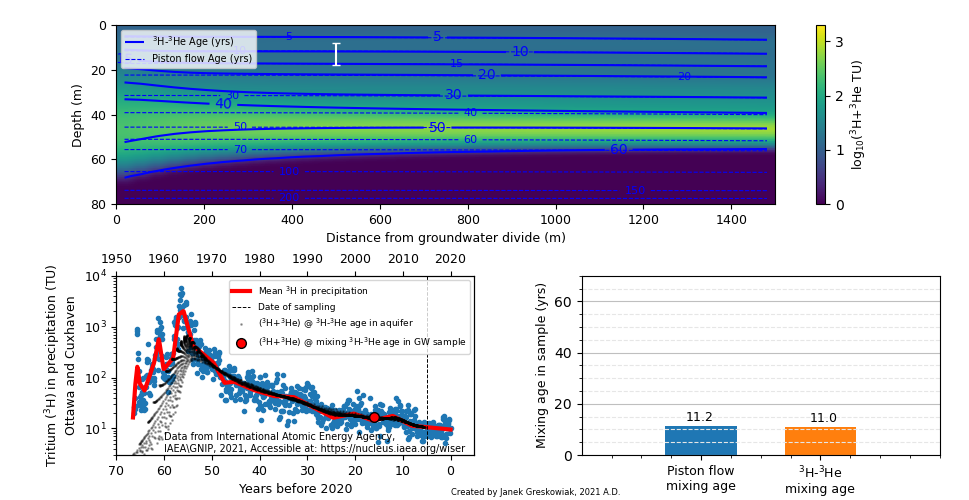

In [4]:
##########################################################################
## From here on: A lot of very complicated plotting on various axis
##########################################################################

fig=plt.figure()
fig.set_size_inches((9.7,5.0))
gs=fig.add_gridspec(2,2)



####### 
ax2=fig.add_subplot(gs[1, 0])
#ax2=plt.subplot(2,2,1)
plt.semilogy(2020-Tr_data[:,0],Tr_data[:,1],'.')
plt.gca().invert_xaxis()
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Tritium ($^3$H) in precipitation (TU)\nOttawa and Cuxhaven',fontsize=9)
plt.xlabel('Years before 2020',fontsize=9)
ax2.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax2.xaxis.get_major_formatter().set_scientific(False)
ax2.set_xlim(70,-5)
ax2.text(60,3.5,'Data from International Atomic Energy Agency,\nIAEA\GNIP, 2021, Accessible at: https://nucleus.iaea.org/wiser',fontsize=7)
ax2.text(0,0.5,'Created by Janek Greskowiak, 2021 A.D.',fontsize=6)

ax3=plt.twiny()
ax3.semilogy(x,tr,'r-',lw=3)
ax3.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax3.xaxis.get_major_formatter().set_scientific(False)
plt.xticks([1950,1960,1970,1980,1990,2000,2010,2020],fontsize=9)
ax3.set_xlim(1950,2025)

pl,=ax3.semilogy([t0,t0],[3,10000],'k--',lw=0.7)
plt.ylim((3,10000))

mean_p_age=np.mean(dt[screen_position:screen_position + screen_length,np.int32(lateral/L*ncol)])/365
mean_C0=np.mean(C0[screen_position:screen_position + screen_length,np.int32(lateral/L*ncol)])
mean_C=np.mean(C[screen_position:screen_position + screen_length,np.int32(lateral/L*ncol)])
mean_tr_age=-np.log(mean_C/mean_C0)/k

bb,=ax3.semilogy(t0+np.log(C.flatten()/C0.flatten())/k,C0.flatten(),'k.',ms=2,alpha=0.3)
aa,=ax3.semilogy(t0-mean_tr_age,mean_C0,'ro',mec='k',ms=7)

ax3.legend(('Mean $^3$H in precipitation','Date of sampling','($^3$H+$^3$He) @ $^3$H-$^3$He age in aquifer','($^3$H+$^3$He) @ mixing $^3$H-$^3$He age in GW sample'),loc=1,fontsize = 6.5)




#######
ax10=fig.add_subplot(gs[0, :])

ish=plt.imshow(np.log10(C0),cmap='viridis',vmin=np.log10(1),vmax=np.log10(2000),aspect='auto',extent=[0,L,B,0])
cbar=plt.colorbar()
cbar.set_label(label='log$_{10}$($^3$H+$^3$He TU)',size=9)

cc=plt.contour(xxi,zzi,-np.log(C/C0)/k,np.array([5,10,15,20,30,40,50,60]),colors='b')
plt.clabel(cc,fmt='%d')

#labels = ['$^3$H-$^3$He Age (yrs)']
#for i in range(len(labels)):
#    cc.collections[i].set_label(labels[i])

#plt.legend(loc='upper left',fontsize = 7)

cc1=plt.contour(xxi,zzi,dt/365,np.array([5,10,15,20,30,40,50,60,70,100,150,200,300]),colors='b',linestyles='dashed',linewidths=0.8)
plt.clabel(cc1,fmt='%d',fontsize=8)

#labels = ['Piston flow Age (yrs)']
#for i in range(len(labels)):
#    cc1.collections[i].set_label(labels[i])

#plt.legend(loc='upper left',fontsize = 7)

cch=cc.legend_elements()    
cch1=cc1.legend_elements()  

plt.legend([cch[0][0],cch1[0][0]],['$^3$H-$^3$He Age (yrs)','Piston flow Age (yrs)'],loc='upper left',fontsize = 7)


plt.xlabel('Distance from groundwater divide (m)',fontsize=9)
plt.ylabel('Depth (m)',fontsize=9)
plt.xticks(fontsize=9)
plt.yticks([0,10,20,30,40],fontsize=9)

er=ax10.errorbar(lateral,screen_position+screen_length/2,yerr=screen_length/2,color='w',capsize=3)

ax10.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax10.xaxis.get_major_formatter().set_scientific(False)




######
ax11=fig.add_subplot(gs[1, 1])

l, = ax11.bar(0.333,mean_p_age,width=0.2)
ll, = plt.bar(0.666,mean_tr_age,width=0.2)
lll = ax11.text(0.29,mean_p_age+2, '%2.1f' % mean_p_age,fontsize=9)
llll = plt.text(0.635,mean_tr_age+2, '%2.1f' % mean_tr_age,fontsize=9)
plt.xticks([0.333,0.666],['Piston flow\nmixing age','$^3$H-$^3$He\nmixing age'],fontsize=9)


plt.ylabel('Mixing age in sample (yrs)',fontsize=9)
plt.ylim((0,70))
plt.xlim((0,1))
plt.grid(which='major', color='0.75', linestyle='-',axis='y')
plt.minorticks_on()
plt.grid(which='minor', color='0.9', linestyle='--',axis='y')

plt.subplots_adjust(left=0.12, right=0.97,bottom=0.09,wspace=0.3,hspace=0.4,top=0.95)

## Sliders

Date = widgets.IntSlider(
    value=t0, 
    min=1954, max=2020, step=1, 
    description='Sampling Date (yr)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

Recharge = widgets.IntSlider(
    value=R, 
    min=10, max=600, step=10, 
    description='Recharge (mm/yr)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
    
)

HydCond=widgets.FloatLogSlider(
    value=K,
    base=10,
    min=0.01, # 
    max=3, # 
    step=0.01, # exponent step
    description='Hydr. Cond. (m/d)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

Depth = widgets.IntSlider(
    value=B, 
    min=5, max=200, step=5, 
    description='Aquifer Depth (m)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

Width = widgets.IntSlider(
    value=L, 
    min=100, max=3000, step=50, 
    description='Catchment Length (m)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)


Dispers=widgets.FloatSlider(
    value=alpha,
    min=0.5, 
    max=20,  
    step=0.1, # exponent step
    description="Long. Dispers. (m)",
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)


VertP = widgets.IntSlider(
    value=screen_position, 
    min=0, max=200, step=1, 
    description='Screen Top Depth (m)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

HoriP = widgets.IntSlider(
    value=lateral, 
    min=10, max=2990, step=10, 
    description='Screen Horiz. Pos.(m)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

Poro=widgets.FloatSlider(
    value=ne,
    min=0.05, 
    max=0.6,  
    step=0.05,
    description="Porosity (-)",
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)


Length = widgets.IntSlider(
    value=screen_length, 
    min=1, max=200, step=1, 
    description='Screen Length (m)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

#### update routine for user interaction 

def update(change):

    screen_length =  Length.get_interact_value()
    alpha=Dispers.get_interact_value() 
    B = Depth.get_interact_value() 
    nrow=np.int32(B)
    screen_position = VertP.get_interact_value() 
    
    if screen_position<0:
        screen_position = 0
        VertP.value=np.int32(screen_position)
        
    if screen_position>B-1:
        screen_position = np.int32(B-1)
        VertP.value=np.int32(screen_position)
    
    if screen_position+np.int32(screen_length)+1 > B:
        screen_length = np.int32(B-screen_position)
        Length.value=np.int32(screen_length) 
    if screen_length<1:
        screen_length=1
        Length.value=np.int32(screen_length) 
        
    K = HydCond.get_interact_value() 
    ne = Poro.get_interact_value()
    L = Width.get_interact_value()   
    
    lateral = HoriP.get_interact_value()
    if lateral >= L-1:
        lateral = L -1
        
    R = Recharge.get_interact_value() 
    t0 = Date.get_interact_value()
    ax10.clear()
    
    C0,C,dt,xxi,zzi=agey(R,L,B,K,ne,alpha,t0,ncol,nrow) # compute
    
    mean_p_age=np.mean(dt[screen_position:screen_position + screen_length,np.int32(lateral/L*ncol)])/365
    mean_C0=np.mean(C0[screen_position:screen_position + screen_length,np.int32(lateral/L*ncol)])
    mean_C=np.mean(C[screen_position:screen_position + screen_length,np.int32(lateral/L*ncol)])
    mean_tr_age=-np.log(mean_C/mean_C0)/k
    
    
    ax10.imshow(np.log10(C0),cmap='viridis',vmin=np.log10(1),vmax=np.log10(2000),aspect='auto',extent=[0,L,B,0])

    cc=ax10.contour(xxi,zzi,-np.log(C/C0)/k,np.array([5,10,15,20,30,40,50,60]),colors='b')
    ax10.clabel(cc,fmt='%d')

    #labels = ['$^3$H-He Age (yrs)']
    #for i in range(len(labels)):
    #  cc.collections[i].set_label(labels[i])

    #ax10.legend(loc='upper left',fontsize = 7)


    cc1=ax10.contour(xxi,zzi,dt/365,np.array([5,10,15,20,30,40,50,60,70,100,150,200,300]),colors='b',linestyles='dashed',linewidths=0.8)
    ax10.clabel(cc1,fmt='%d',fontsize=8)

    #labels = ['Piston flow Age (yrs)']
    #for i in range(len(labels)):
    #  cc1.collections[i].set_label(labels[i])

    #ax10.legend(loc='upper left',fontsize = 7)

    cch=cc.legend_elements()    
    cch1=cc1.legend_elements()  

    ax10.legend([cch[0][0],cch1[0][0]],['$^3$H-$^3$He Age (yrs)','Piston flow Age (yrs)'],loc='upper left',fontsize = 7)

    ax10.set_xlabel('Distance from groundwater divide (m)',fontsize=9)
    ax10.set_ylabel('Depth (m)',fontsize=9)
    ax10.tick_params(axis='both', which='major', labelsize=9)
    ax10.errorbar(lateral,screen_position+screen_length/2,yerr=screen_length/2,color='w',capsize=3)
    pl.set_xdata(t0)


    aa.set_xdata(t0-mean_tr_age)
    aa.set_ydata(mean_C0)
    bb.set_xdata(t0+np.log(C.flatten()/C0.flatten())/k)
    bb.set_ydata(C0.flatten())

    
    l.set_height(mean_p_age)
    lll.set_y(mean_p_age+2)
    lll.set_text('%2.1f' % mean_p_age)

    ll.set_height(mean_tr_age)
    llll.set_y(mean_tr_age+2)
    llll.set_text('%2.1f' % mean_tr_age)
    ylimm=70
    if (mean_tr_age > 60) or (mean_p_age > 60):
        if mean_tr_age > mean_p_age:
         ylimm=mean_tr_age+10 
        else:
         ylimm=mean_p_age+10 
        
    ax11.set_ylim(0,ylimm)
    
    ax10.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax10.xaxis.get_major_formatter().set_scientific(False)
    fig.canvas.draw()


Date.observe(update, 'value')
Recharge.observe(update, 'value')
Depth.observe(update, 'value')
HydCond.observe(update, 'value')
Width.observe(update, 'value')
Dispers.observe(update, 'value')
VertP.observe(update, 'value')
Length.observe(update, 'value')
HoriP.observe(update, 'value')
Poro.observe(update, 'value')



vbox1=widgets.VBox(
    [   Date,
        Recharge,
        Depth,
        Width,
        HydCond])



vbox2=widgets.VBox([
        Dispers,
        Poro,
        VertP,
        Length,
        HoriP])

box_layout = widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')
 

vbox1.layout = box_layout
vbox2.layout = box_layout
 

vbox1.layout.width = '500px'


widgets.HBox([vbox1, vbox2])
